In [ ]:
!pip install pandas seaborn sklearn catboost ppscore

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ppscore as pps

In [7]:
sns.set_theme(color_codes = True)

### Load Data

In [8]:
df = pd.read_csv('diabetes.csv')

print(f'Shape: {df.shape}')

df.head()

Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Describe

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Types

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Basic Stats

In [11]:
# Numeric and categorical features
num = df.select_dtypes(['int64', 'float64', 'uint8'])
cat = df.select_dtypes(['object'])

# Calculate State
aux = pd.DataFrame(
    {
        
        'type': df.dtypes,
        'missing values': df.isnull().sum(),
        'mean': num.mean(),
        'median': num.median(),
        'max': num.max(),
        'min': num.min(),
        '# Unique Values': df.nunique(),
        'STD': num.std(),
        'Skew': num.skew(),
        'Kurtosis': num.kurtosis()
           
    },
    index = df.columns)

aux

,type,missing values,mean,median,max,min,# Unique Values,STD,Skew,Kurtosis
Pregnancies,int64,0,3.845052,3.0000,17.00,0.000,17,3.369578,0.901674,0.159220
Glucose,int64,0,120.894531,117.0000,199.00,0.000,136,31.972618,0.173754,0.640780
BloodPressure,int64,0,69.105469,72.0000,122.00,0.000,47,19.355807,-1.843608,5.180157
SkinThickness,int64,0,20.536458,23.0000,99.00,0.000,51,15.952218,0.109372,-0.520072
Insulin,int64,0,79.799479,30.5000,846.00,0.000,186,115.244002,2.272251,7.214260
BMI,float64,0,31.992578,32.0000,67.10,0.000,248,7.884160,-0.428982,3.290443
DiabetesPedigreeFunction,float64,0,0.471876,0.3725,2.42,0.078,517,0.331329,1.919911,5.594954
Age,int64,0,33.240885,29.0000,81.00,21.000,52,11.760232,1.129597,0.643159
Outcome,int64,0,0.348958,0.0000,1.00,0.000,2,0.476951,0.635017,-1.600930


### Null Values

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Skewness

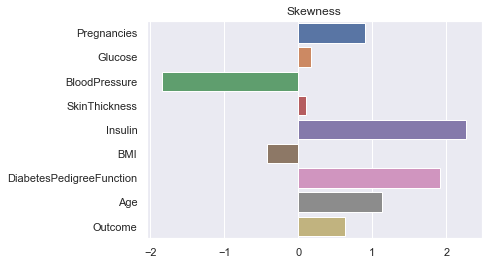

In [13]:
plt.title('Skewness')

sns.barplot(x = df.skew(), y = df.columns)

plt.show()

### Kurtuosis

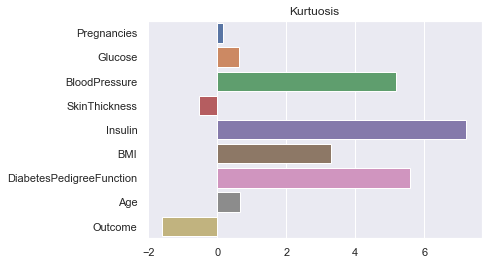

In [14]:
plt.title('Kurtuosis')

sns.barplot(x = df.kurtosis(), y = df.columns)

plt.show()

### Histogram

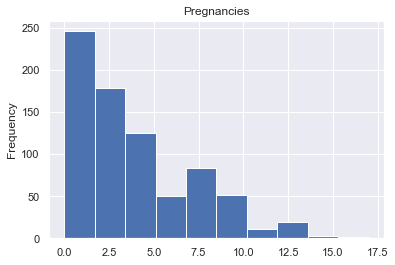

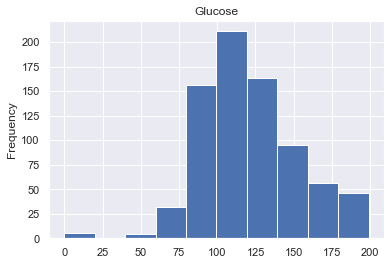

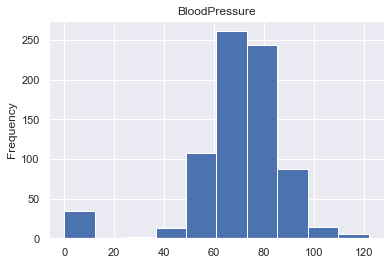

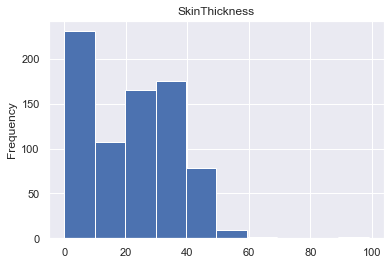

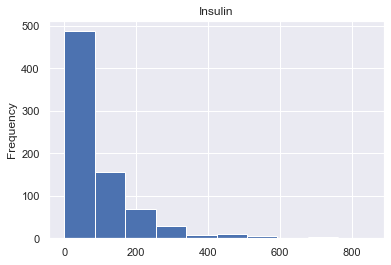

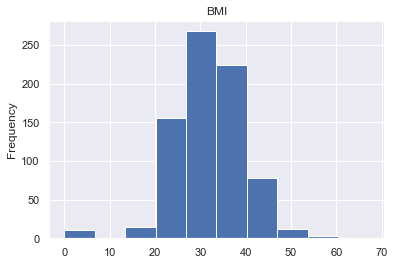

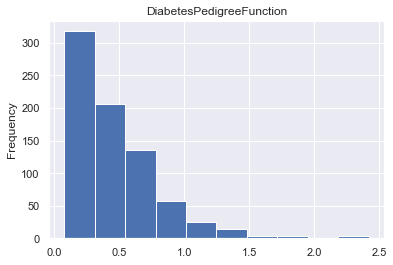

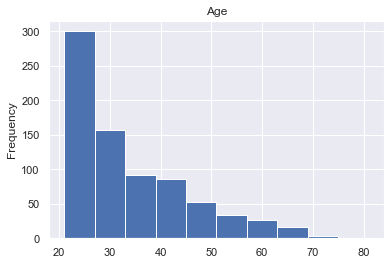

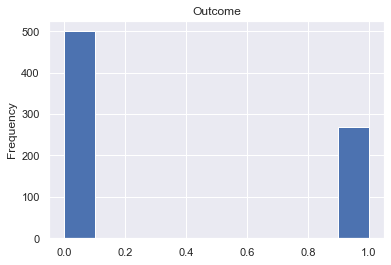

In [15]:
for i in df.columns:
    
    df[i].plot.hist()
    
    plt.title(i)
    
    plt.show()

### Pairplot

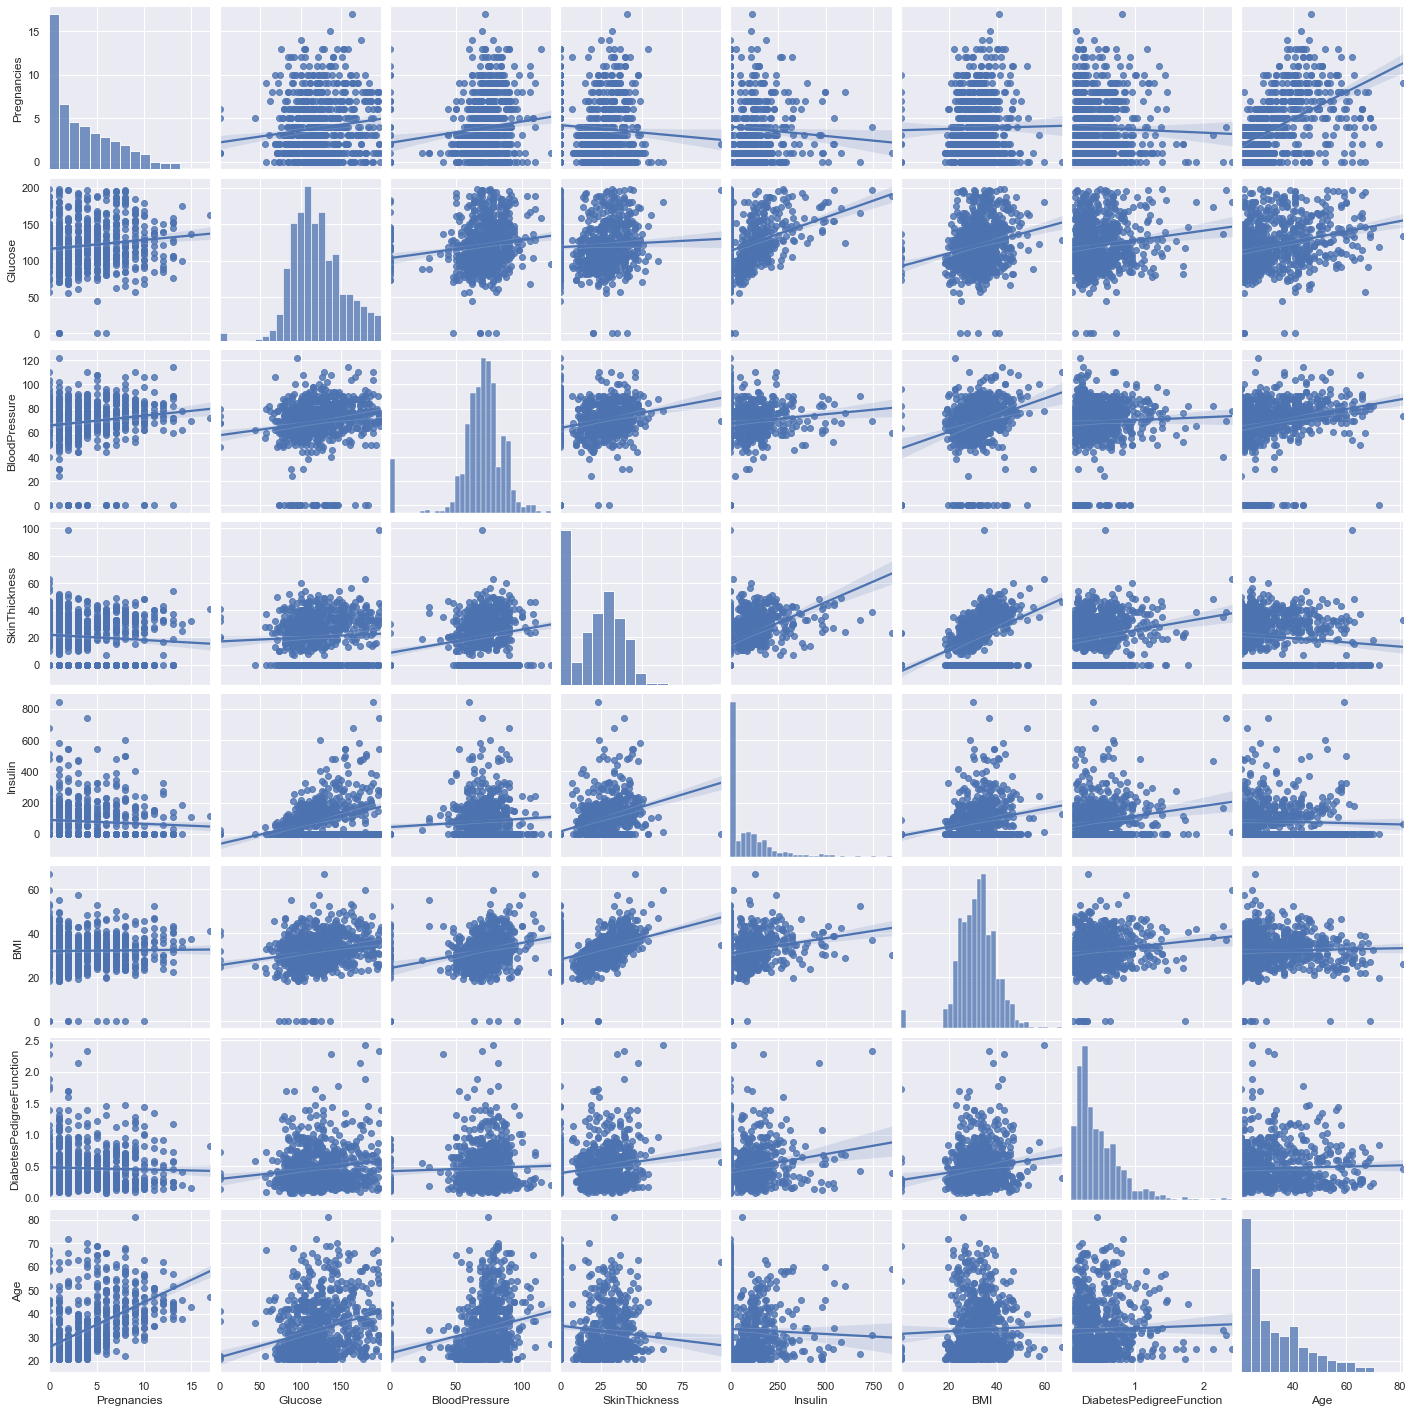

In [16]:
sns.pairplot(df.drop('Outcome', axis = 1), kind='reg')

plt.show()

### Boxplot

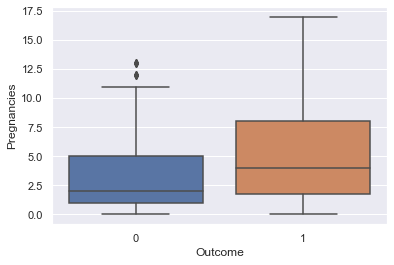

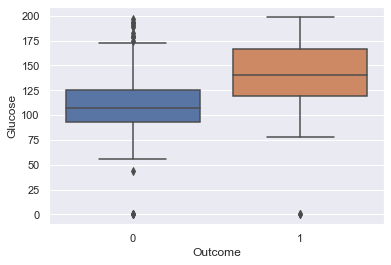

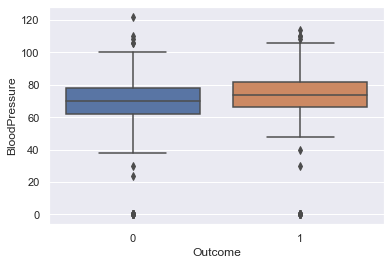

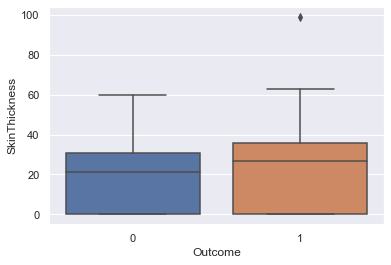

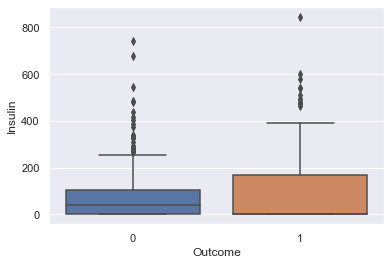

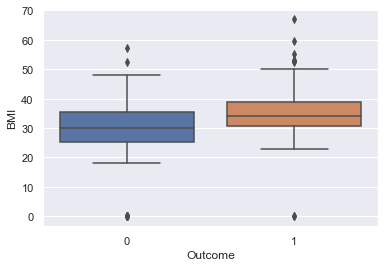

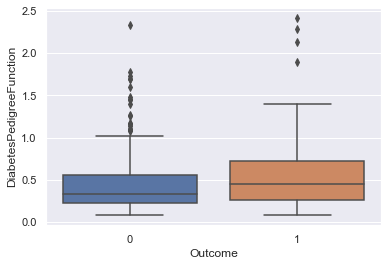

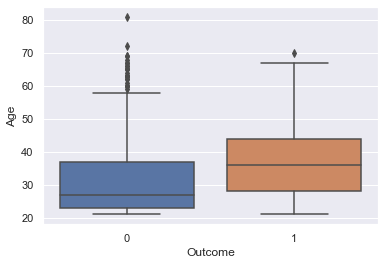

In [17]:
for i in df.drop('Outcome', axis = 1).columns:
    sns.boxplot(data = df, x = 'Outcome', y = i)
    plt.show()

### Correlation

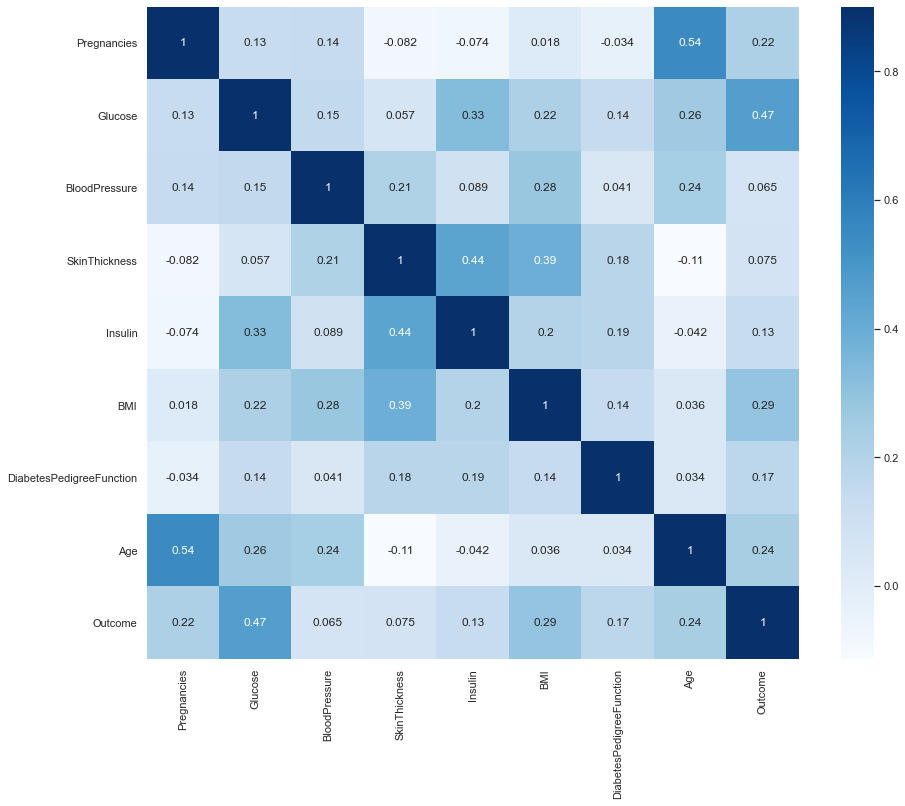

In [18]:
corr = df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(
    corr,
    vmax=0.9,
    cmap="Blues", square=True, annot = True
)

plt.show()

### PCA

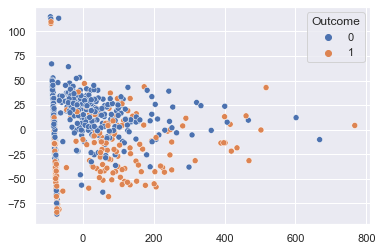

In [24]:
pca = PCA(n_components = 2)

p = pca.fit_transform(df, )

sns.scatterplot(x = p[:,0], y = p[:,1], hue = df['Outcome'])

plt.show()

### T-SNE

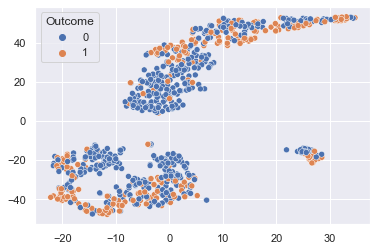

In [26]:
pca = TSNE(n_components = 2)

p = pca.fit_transform(df, )

sns.scatterplot(x = p[:,0], y = p[:,1], hue = df['Outcome'])

plt.show()

### [Predictive Power Score](https://github.com/8080labs/ppscore)

In [41]:
pps_matrix = pps.matrix(df)

pps_matrix.query('case != "predict_itself"').sort_values('ppscore', ascending=False).head(20)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
63,Age,Pregnancies,0.239007,regression,True,mean absolute error,2.683594,2.042196,DecisionTreeRegressor()
7,Pregnancies,Age,0.232018,regression,True,mean absolute error,9.074219,6.968832,DecisionTreeRegressor()
31,SkinThickness,Insulin,0.206054,regression,True,mean absolute error,79.270833,62.936733,DecisionTreeRegressor()
32,SkinThickness,BMI,0.146071,regression,True,mean absolute error,5.842057,4.988702,DecisionTreeRegressor()
73,Outcome,Glucose,0.116111,regression,True,mean absolute error,24.985677,22.084553,DecisionTreeRegressor()
39,Insulin,SkinThickness,0.094156,regression,True,mean absolute error,13.541667,12.266637,DecisionTreeRegressor()
21,BloodPressure,SkinThickness,0.041698,regression,True,mean absolute error,13.541667,12.977007,DecisionTreeRegressor()
77,Outcome,BMI,0.037792,regression,True,mean absolute error,5.842057,5.621273,DecisionTreeRegressor()
5,Pregnancies,BMI,0.012499,regression,True,mean absolute error,5.842057,5.769035,DecisionTreeRegressor()
37,Insulin,Glucose,0.009180,regression,True,mean absolute error,24.985677,24.756304,DecisionTreeRegressor()


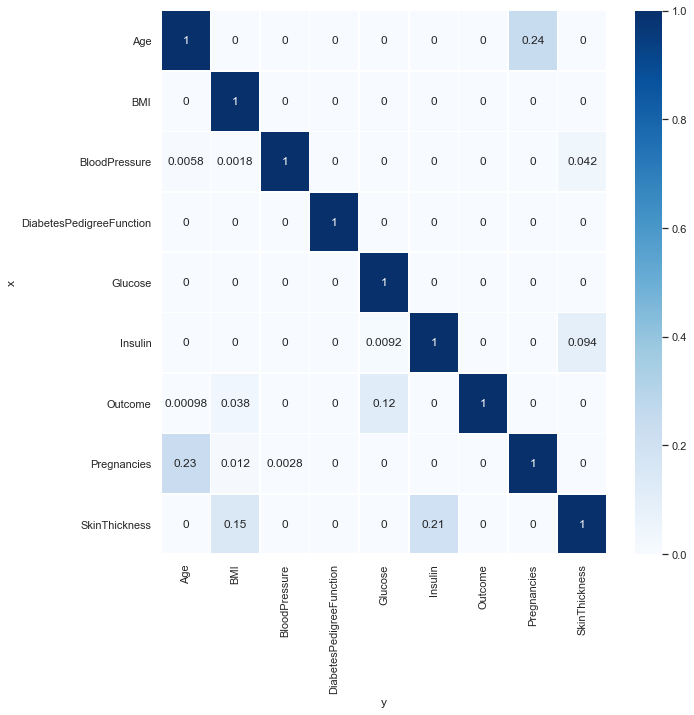

In [44]:
plt.figure(figsize=(10,10))

sns.heatmap(pps_matrix.pivot(index = 'x', columns = 'y', values = 'ppscore'),
            vmin=0, 
            vmax=1, 
            cmap="Blues", 
            linewidths=0.5, 
            annot=True
           )

plt.show()